In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from IPython.display import Image, display
from pandas.tools.plotting import scatter_matrix 
%matplotlib inline

raw_data = pd.DataFrame()

In [2]:
type(raw_data)

pandas.core.frame.DataFrame

In [3]:
def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [2]:
def process(chunk):
    global raw_data
    filtered_chunk = chunk[(chunk.date > 20160000) & (chunk.date < 20170000)]
    raw_data = raw_data.append(filtered_chunk, ignore_index=True)

In [5]:
chunksize = 5000
counter = 0
csv_path = "D:\\tempd\\train_v2.csv"

JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

chunt_itr = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     chunksize=chunksize)

for chunk in chunt_itr:
    process(chunk)
print('done chunking')

done chunking


In [3]:
for column in JSON_COLUMNS:
    column_as_df = json_normalize(raw_data[column])
    column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
    raw_data = raw_data.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

NameError: name 'JSON_COLUMNS' is not defined

In [10]:
train_df = raw_data

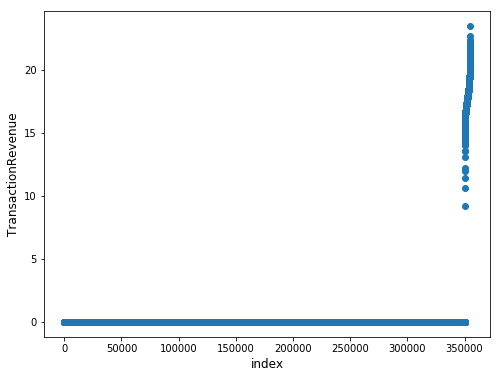

In [11]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
gdf = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [13]:
nzi = pd.notnull(train_df["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  5164  and ratio is :  0.01183337037945155
Number of unique customers with non-zero revenue :  4573 and the ratio is :  0.012888588258504552


In [14]:
const_cols = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]
const_cols

NameError: name 'df_train' is not defined

In [ ]:
cols_to_drop = const_cols
train_df = train_df.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)

In [ ]:
train_df.to_csv("train-flattened-drop.csv", index=False)

In [ ]:
train_df["totals.transactionRevenue"].fillna(0, inplace=True)

In [ ]:
train